# IMDB sentiment classification Using CNN-LSTM

## Reading Data and ETL

In [1]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
# Embedding
max_features = 20000
maxlen = 100
embedding_size = 128

# Convolution
kernel_size = 5
filters = 64
pool_size = 4

# LSTM
lstm_output_size = 70

# Training
batch_size = 30
epochs = 2

In [3]:
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 100)
x_test shape: (25000, 100)


## Build a Neural Network

In [4]:
print('Build model...')

model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(lstm_output_size))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy','mae','mse','mape','cosine'])

Build model...
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
print('Train...')
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

Train...
Instructions for updating:
Use tf.cast instead.
Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 3398s 136ms/step - loss: 0.3863 - acc: 0.8201 - mean_absolute_error: 0.2487 - mean_squared_error: 0.1235 - mean_absolute_percentage_error: 124578452.0084 - cosine_proximity: -0.5000 - val_loss: 0.3428 - val_acc: 0.8488 - val_mean_absolute_error: 0.2177 - val_mean_squared_error: 0.1080 - val_mean_absolute_percentage_error: 70510414.5760 - val_cosine_proximity: -0.5000
Epoch 2/2
25000/25000 [==============================] - 351s 14ms/step


ValueError: too many values to unpack (expected 2)

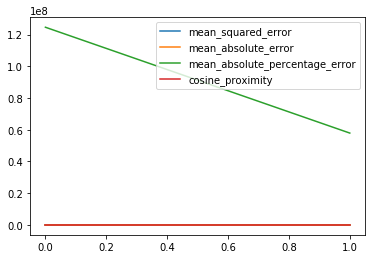

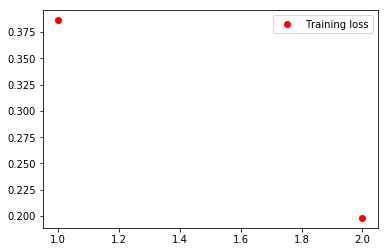

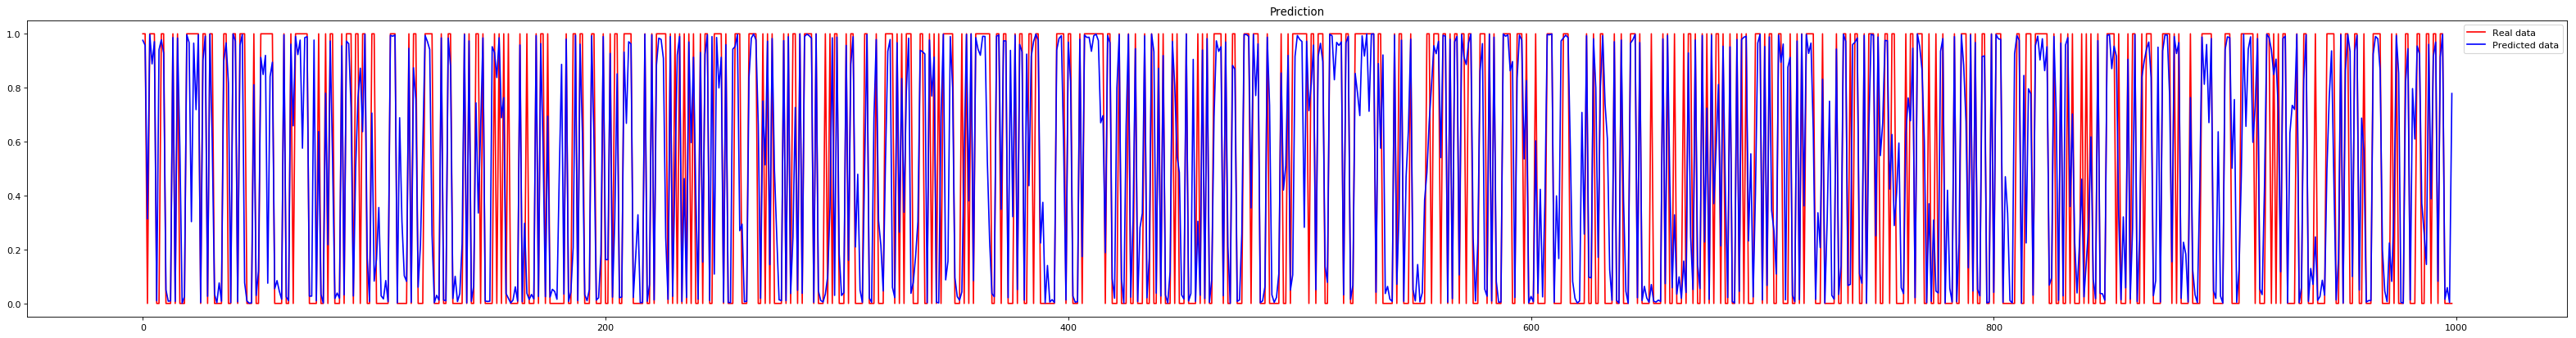

In [16]:
import matplotlib.pyplot as plt
loss = history.history['loss']
acc = history.history['mean_absolute_error']
val_loss = history.history['val_loss']
val_acc = history.history['val_mean_absolute_error']
mape_loss=history.history['mean_absolute_percentage_error']
cosine_los=history.history['cosine_proximity']
plt.plot(history.history['mean_squared_error'], label = 'mean_squared_error')
plt.plot(history.history['mean_absolute_error'], label = 'mean_absolute_error')
plt.plot(history.history['mean_absolute_percentage_error'], label = 'mean_absolute_percentage_error')
plt.plot(history.history['cosine_proximity'], label = 'cosine_proximity')
plt.legend()
plt.show()
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.legend()
plt.show()

y_pred = model.predict(x_test)

from matplotlib.pyplot import figure
figure(num=None, figsize=(50, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(y_test[1:1000], color = 'red', label = 'Real data')
plt.plot(y_pred[1:1000], color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
